# Mini Contest
## Daniel Kang (Data Mining A)

### I. Get Data

#### a) Get Values

In [1]:
import numpy as np
import sys
mini_data = np.loadtxt("./smaller_data.csv", delimiter = ",")
print mini_data.shape
num_records = mini_data.shape[0]
num_features = mini_data.shape[1]
mini_data[0:2,0:num_features]


(6666L, 23L)


array([[   4.  ,    1.  ,    1.  ,  709.  ,   15.  ,   -4.  ,   68.8 ,
           8.54,    8.8 ,   -7.54,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    1.  ],
       [   4.  ,    1.  ,    1.  ,  502.  ,   14.  ,   -4.  ,   68.8 ,
           8.54,    8.8 ,   -7.54,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           1.  ,    0.  ]])

#### b) Get Header

In [20]:
mini_header = np.loadtxt("./smaller_header.csv", delimiter = ",", dtype="string")
mini_header[0:num_features]

array(['"weekday"', '"dayofyear"', '"month"', '"place_id"',
       '"num_of_rack"', '"Temperature"', '"Humidity"', '"WindSpeed"',
       '"Visibility"', '"WindChill"', '"Fog"', '"Rain"', '"Snow"',
       '"Hail"', '"Thunder"', '"Day_-7"', '"Day_-6"', '"Day_-5"',
       '"Day_-4"', '"Day_-3"', '"Day_-2"', '"Day_-1"', '"Day_0"'], 
      dtype='|S13')

#### c) Get Data type

In [12]:
mini_type = np.loadtxt("./smaller_type.csv", delimiter = ",", dtype="string")
mini_type

array(['"numeric"', '"numeric"', '"numeric"', '"integer"', '"numeric"',
       '"numeric"', '"numeric"', '"numeric"', '"numeric"', '"numeric"',
       '"numeric"', '"numeric"', '"numeric"', '"numeric"', '"numeric"',
       '"integer"', '"integer"', '"integer"', '"integer"', '"integer"',
       '"integer"', '"integer"', '"integer"'], 
      dtype='|S9')

#### d) Convert the data to numeric data type (Not necessary since it was all processed in R)

In [52]:
mini_numeric = np.zeros((num_records,num_features))

string_to_num = {}
for j in range(num_features) : 
    dummy = 0
    type = mini_type[j].lstrip('"').rstrip('"')
    if(type == 'integer'):
        for i in range(num_records):
            mini_numeric[i][j] = int(mini_data[i][j])
    elif (type == 'numeric'): 
        for i in range(num_records):
            mini_numeric[i][j] = float(mini_data[i][j])
    else :
        for i in range(num_records):
            key = mini_data[i][j]
            
            if key in string_to_num.keys() : 
                mini_numeric[i][j] = int(string_to_num[key])
            else : 
                string_to_num[key] = int(dummy)
                mini_numeric[i][j] = int(dummy)
                dummy += 1
                
                
np.savetxt("./smaller-numeric.txt", mini_numeric, fmt='%.1f', delimiter = " ")
            


### II. Data Exploration

#### Load numeric Data

In [2]:
#Load the numeric data
# mini_numeric = np.loadtxt("./smaller-numeric.txt", delimiter = " ")

#Separte the target and Data
miniLabel=mini_data[:,num_features-1]
miniData=np.copy(mini_data[:,0:num_features-1])


In [4]:
print miniData
print miniLabel

[[  4.   1.   1. ...,   0.   0.   0.]
 [  4.   1.   1. ...,   0.   0.   1.]
 [  4.   1.   1. ...,   0.   1.   0.]
 ..., 
 [  2.  90.   3. ...,   0.   0.   0.]
 [  2.  90.   3. ...,   0.   0.   0.]
 [  2.  90.   3. ...,   0.   0.   0.]]
[ 1.  0.  0. ...,  0.  0.  1.]


#### We observe correlation between the attributes and the prediction. 

In [ ]:
from sklearn.preprocessing import normalize

sample = [1,2,5,6,8,9,11,12]
#sample = [0,3,4,7,10]
smallData = miniData[:,sample]
smallHeader = mini_header[sample]
smallData_norm = smallData
#smallData_norm = normalize(smallData)

In [31]:
from scipy.stats.stats import pearsonr   

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = range(num_features-1)
correlation = []

for i in X :
    feature = miniData[:,i]
    cor = pearsonr(feature,miniLabel)
    correlation.append(cor)
    print mini_header[i],":",cor



"weekday" : (0.0054576854751456497, 0.65594717106725675)
"dayofyear" : (0.16333151054335229, 4.4324856773861893e-41)
"month" : (0.15307530460696844, 3.0981252599144282e-36)
"place_id" : (-0.028647000921067534, 0.019338423231755334)
"num_of_rack" : (0.064833361451254359, 1.1711731869849759e-07)
"Temperature" : (0.14727093329344265, 1.2263214742924925e-33)
"Humidity" : (-0.11811259197234673, 3.8341854780940389e-22)
"WindSpeed" : (0.0073501967190646358, 0.54850183456604462)
"Visibility" : (-0.12820502247295798, 7.8687316065537564e-26)
"WindChill" : (-0.15758055818881028, 2.5309088570261897e-38)
"Fog" : (-0.014320309974890592, 0.24239129349361149)
"Rain" : (-0.062137811068241795, 3.8297221823577643e-07)
"Snow" : (-0.06262136224268966, 3.1072912241526592e-07)
"Hail" : (nan, 1.0)
"Thunder" : (nan, 1.0)
"Day_-7" : (0.046878653037926828, 0.00012875820945344957)
"Day_-6" : (0.050069018443911775, 4.3190869671746745e-05)
"Day_-5" : (0.045283470334934343, 0.00021696383767788813)
"Day_-4" : (0.0165

#### Observations :
    -Hail and thunder gives NA values since they are 0 over all dates

#### Look at correlation matrix between the variables of low p-values

In [55]:
# Pick out features
corSet = [1,2,4,5,6,8,9,11,12,16]
corData = miniData[:,corSet]
corHeader = mini_header[corSet]

print corHeader

n = len (corSet)

#Compute and print out correlation matrix
mat = np.corrcoef(corData)
print mat


['"dayofyear"' '"month"' '"num_of_rack"' '"Temperature"' '"Humidity"'
 '"Visibility"' '"WindChill"' '"Rain"' '"Snow"' '"Day_-6"']
[[ 1.          0.99989907  1.         ...,  0.01811435  0.01797546
   0.01785387]
 [ 0.99989907  1.          0.99989907 ...,  0.01641798  0.01629771
   0.01619242]
 [ 1.          0.99989907  1.         ...,  0.01811435  0.01797546
   0.01785387]
 ..., 
 [ 0.01811435  0.01641798  0.01811435 ...,  1.          0.99999912
   0.99999691]
 [ 0.01797546  0.01629771  0.01797546 ...,  0.99999912  1.          0.99999933]
 [ 0.01785387  0.01619242  0.01785387 ...,  0.99999691  0.99999933  1.        ]]


### III. Data Analysis

#### Simple Decision Tree

#### Choose attributes : 
Out of ['"dayofyear"' '"month"' '"num_of_rack"' '"Temperature"' '"Humidity"'
 '"Visibility"' '"WindChill"' '"Rain"' '"Snow"' '"Day_-6"'] we pick month, "num_of_rack" day_-6 for test (attributes with few values for domain)

In [237]:
treeSample = [2,4,16]
treeData = miniData[:,treeSample]
treeHeader = mini_header[treeSample]

print treeData
print treeHeader

[[  1.  15.   0.]
 [  1.  14.   0.]
 [  1.  15.   0.]
 ..., 
 [  3.  30.   0.]
 [  3.  22.   0.]
 [  3.  15.   0.]]
['"month"' '"num_of_rack"' '"Day_-6"']


[0.53357142857142859, 0.58903891059644664, 0.56835741170687182, 0.59964992683948737, 0.61591079890243849, 0.61963967585147317, 0.60784366335953732, 0.60941656156515722, 0.60951844955040468, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607, 0.60960629690478607]


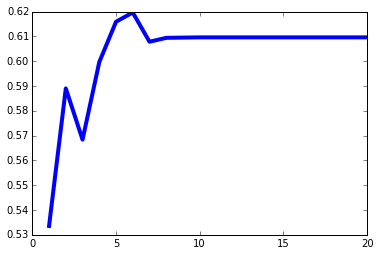

In [238]:
from sklearn import cross_validation
from sklearn import tree

simple_tree=[]
index = []

n=20
X = range(1,n+1)
for i in X:
    dt = tree.DecisionTreeClassifier(random_state=0,max_depth=i)
    cv_auc=cross_validation.cross_val_score(dt, treeData, miniLabel, scoring='roc_auc', cv=10)
    simple_tree.append( sum(cv_auc) / float(len(cv_auc)) )
    
print simple_tree

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,simple_tree, linewidth=4.0)


#### We see we reach maximum at n=6

#### Simple K-nn Classifier
##### Normalize Data

In [137]:
from sklearn.preprocessing import normalize

knnSample = [3,4,10,11,12]
knnData = miniData[:,knnSample]
knnHeader = mini_header[knnSample]
knnData_norm = normalize(knnData)

print knnData
print knnHeader
print knnData_norm


[[  7.09000000e+02   1.50000000e+01   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  5.02000000e+02   1.40000000e+01   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  5.03000000e+02   1.50000000e+01   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 ..., 
 [  5.05000000e+02   3.00000000e+01   0.00000000e+00   2.00000000e-01
    0.00000000e+00]
 [  5.04000000e+02   2.20000000e+01   0.00000000e+00   2.00000000e-01
    0.00000000e+00]
 [  1.02000000e+02   1.50000000e+01   0.00000000e+00   2.00000000e-01
    0.00000000e+00]]
['"place_id"' '"num_of_rack"' '"Fog"' '"Rain"' '"Snow"']
[[  9.99776275e-01   2.11518253e-02   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.99611344e-01   2.78776072e-02   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.99555648e-01   2.98078225e-02   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 ..., 
 [  9.98240046e-01   5.93013889e-02   0.00000000e+00   3.95342592e-04
    0.00000000e+00]
 [  9.99048585e-01   4.36092

[0.56844614467475396, 0.60619116296142039, 0.62840582350800189, 0.64172532274286032, 0.65870563275679261, 0.66919942494168239, 0.67135534409074782, 0.67291770177663435, 0.68793555860536115, 0.69554094690507928, 0.69754793788448599, 0.69676392777256757, 0.69913265483204967, 0.70474843551015309, 0.70809951584626551, 0.71408352513577289, 0.71222275576977545, 0.71461043352505527, 0.71483937771326622, 0.7148085764970169, 0.71828051011412486, 0.71929592356787952, 0.71968603838191869, 0.72451259213725849, 0.72920988597031988, 0.73137408941003146, 0.73527661692540958, 0.7384315359814696, 0.73973390927650118, 0.73922477692301203, 0.73968362025866852, 0.7432398055040349, 0.7442376341343091, 0.74589015865040209, 0.74679708393906929, 0.74774494995027307, 0.75015658567572296, 0.74960482312618537, 0.74889272294182119, 0.7507602737753809, 0.75232822658985987, 0.75135799463097441, 0.75066993362593859, 0.75318101286690775, 0.75450469717677016, 0.75244913045483108, 0.75249294835081804, 0.754844691819396

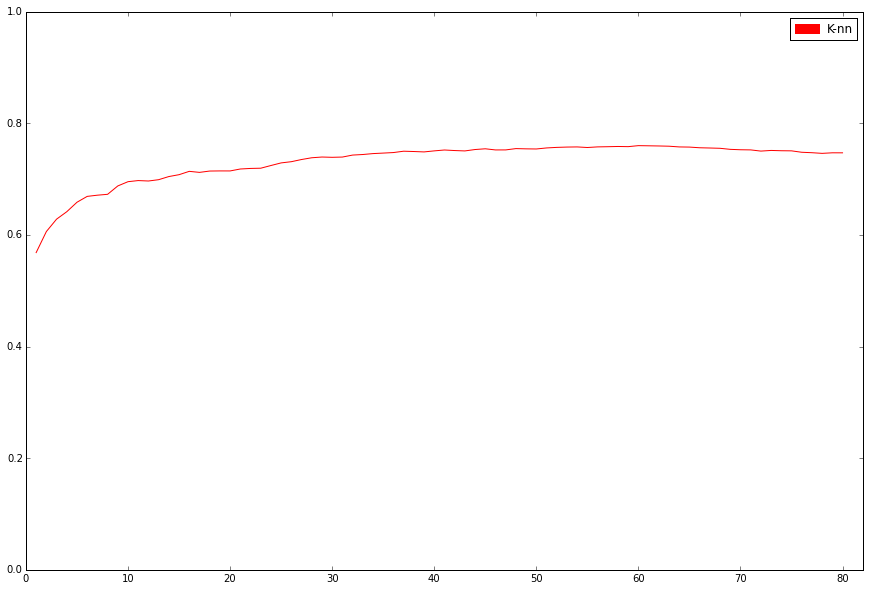

In [133]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics


n=80
X=range(1,n+1)
knn_val = []

#k-nn
kf = KFold(len(knnData_norm), n_folds=10)

for i in X :
    auc=0
    for train, test in kf :
        data_train, data_test, labels_train, labels_test = knnData_norm[train], knnData_norm[test], miniLabel[train], miniLabel[test]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(data_train, labels_train)
        prob = neigh.predict_proba(data_test)
        auc += metrics.roc_auc_score(labels_test, prob[:,1])
    knn_val.append(auc/10)

#Plot the results

plt.figure(figsize=(15,10))
plt.axis([0,n+2,0,1])

line_knn_val = plt.plot(X, knn_val, color='red', label = 'K-nn ')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='K-nn')
plt.legend(handles=[red_patch])

print knn_val

In [266]:
print knn_val.index(max(knn_val)) + 1
print max(knn_val)

60
0.760135275281


We observe that it reaches maximum at n=60

#### Naive-Bayes

#### Continuous Data

In [206]:
from sklearn.preprocessing import normalize

cnbSample = [2,3,4,5,8,9,10,11,12]
cnbData = miniData[:,cnbSample]
cnbHeader = mini_header[cnbSample]

print cnbData
print cnbHeader

[[  1.00000000e+00   7.09000000e+02   1.50000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   5.02000000e+02   1.40000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   5.03000000e+02   1.50000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  3.00000000e+00   5.05000000e+02   3.00000000e+01 ...,   0.00000000e+00
    2.00000000e-01   0.00000000e+00]
 [  3.00000000e+00   5.04000000e+02   2.20000000e+01 ...,   0.00000000e+00
    2.00000000e-01   0.00000000e+00]
 [  3.00000000e+00   1.02000000e+02   1.50000000e+01 ...,   0.00000000e+00
    2.00000000e-01   0.00000000e+00]]
['"month"' '"place_id"' '"num_of_rack"' '"Temperature"' '"Visibility"'
 '"WindChill"' '"Fog"' '"Rain"' '"Snow"']


In [207]:
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.cross_validation import train_test_split

cnbData_train, cnbData_test, cnbLabel_train, cnbLabel_test = train_test_split(cnbData, miniLabel, test_size=0.33, random_state=42)

cnb = naive_bayes.GaussianNB()
cnb.fit(cnbData_train, cnbLabel_train)
cprobabilities= cnb.predict_proba(cnbData_test)
print metrics.roc_auc_score(cnbLabel_test, cprobabilities[:,1])


0.686728830787


#### Discrete Data

In [231]:
from sklearn.preprocessing import normalize

dnbSample = [0,1,3,4,6,16]
dnbData = miniData[:,dnbSample]
dnbHeader = mini_header[dnbSample]

print dnbData
print dnbHeader

[[   4.     1.   709.    15.    68.8    0. ]
 [   4.     1.   502.    14.    68.8    0. ]
 [   4.     1.   503.    15.    68.8    0. ]
 ..., 
 [   2.    90.   505.    30.    67.2    0. ]
 [   2.    90.   504.    22.    67.2    0. ]
 [   2.    90.   102.    15.    67.2    0. ]]
['"weekday"' '"dayofyear"' '"place_id"' '"num_of_rack"' '"Humidity"'
 '"Day_-6"']


In [232]:
#Discrete Dataset

from sklearn import naive_bayes
from sklearn import metrics
from sklearn.cross_validation import train_test_split

dnbData_train, dnbData_test, dnbLabel_train, dnbLabel_test = train_test_split(dnbData, miniLabel, test_size=0.33, random_state=42)

dnb = naive_bayes.MultinomialNB(alpha = 2)
dnb.fit(dnbData_train, dnbLabel_train)
dprobabilities= dnb.predict_proba(dnbData_test)
print metrics.roc_auc_score(dnbLabel_test, dprobabilities[:,1])

0.685464136808


#### Combine scores

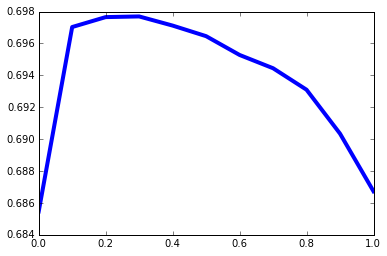

In [233]:
weights = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auc_scores = []
for weight in weights:
    auc_scores.append(metrics.roc_auc_score(dnbLabel_test, weight * cprobabilities[:,1] + (1 - weight) * dprobabilities[:,1]))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(weights,auc_scores,linewidth=4.0)

In [269]:
print weights[auc_scores.index(max(auc_scores))]
print max(auc_scores)

0.3
0.697696962852


## IV. Bagging, Boosting

#### Bagging

[0.6836053307733575, 0.68578060441784083, 0.7068627589387394, 0.71552150097410849, 0.72896960969779112, 0.73632012875172947, 0.72843314415864313, 0.71843088535637312, 0.71960852133156405, 0.71700266350434361, 0.71872852961383893, 0.7167861949534593, 0.7068780529124431, 0.70131457586281543, 0.70571100507289342, 0.70675452466329736, 0.71637208120394169, 0.71125801168930169, 0.71404151490338919, 0.7106909582027463]


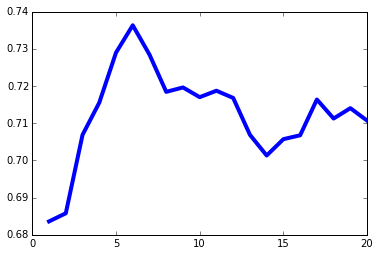

In [250]:
from sklearn import cross_validation
from sklearn import tree
from sklearn import ensemble

bagData_train, bagData_test, bagLabel_train, bagLabel_test = train_test_split(miniData, miniLabel, test_size=0.33, random_state=42)

bagging_tree=[]
index = []

n=20
X = range(1,n+1)
for i in X:
    bagging_dt=ensemble.BaggingClassifier (
    base_estimator=tree.DecisionTreeClassifier(random_state=0,max_depth=i ,min_samples_leaf=5), 
    n_estimators=45)
    bagging_dt.fit(bagData_train,bagLabel_train)
    probabilities_bg_dt = bagging_dt.predict_proba(bagData_test)
    bagging_tree.append(metrics.roc_auc_score(bagLabel_test,probabilities_bg_dt[:,1],sample_weight=None))
    
    
print bagging_tree

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,bagging_tree, linewidth=4.0)

Maximized when N=6, AUC = 0.736

#### Bagging for selected features

[0.63420108987209534, 0.68691235847192034, 0.69067938184111199, 0.69096408504390538, 0.68825234586027428, 0.68253004677603024, 0.68350062587646243, 0.6811912358471921, 0.68234298971303808, 0.68204887483411925, 0.68235946014625748, 0.68762058710035678, 0.68064418217240308, 0.68170770157457361, 0.68080418066653503, 0.68271710383902273, 0.68559472381436415, 0.68220181457115714, 0.68252887031651488, 0.68242651833865109]


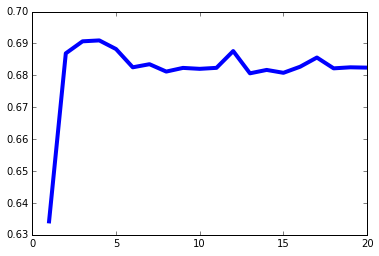

In [241]:
from sklearn import cross_validation
from sklearn import tree
from sklearn import ensemble

sbagData_train, sbagData_test, sbagLabel_train, sbagLabel_test = train_test_split(treeData, miniLabel, test_size=0.33, random_state=42)

sbagging_tree=[]
index = []

n=20
X = range(1,n+1)
for i in X:
    sbagging_dt=ensemble.BaggingClassifier (
    base_estimator=tree.DecisionTreeClassifier(random_state=0,max_depth=i ,min_samples_leaf=5), 
    n_estimators=60)
    sbagging_dt.fit(sbagData_train,sbagLabel_train)
    sprobabilities_bg_dt = sbagging_dt.predict_proba(sbagData_test)
    sbagging_tree.append(metrics.roc_auc_score(sbagLabel_test,sprobabilities_bg_dt[:,1],sample_weight=None))
    
    
print sbagging_tree

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,sbagging_tree, linewidth=4.0)

Not as good as general bagging

#### Gradient Boost Trees

1
2
3
4
5
6
7
8
9
10
[0.17997728781602182, 0.14850382239023388, 0.15069052537092534, 0.14901423789553053, 0.15337401934003489, 0.1451033781862196, 0.15009086784939057, 0.14428656596645967, 0.13516207901348937, 0.1402580469382233]


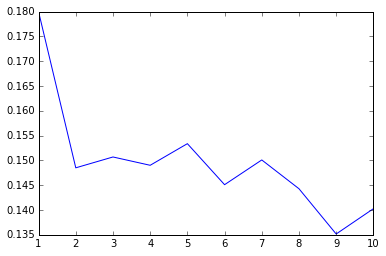

In [256]:
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingClassifier

n = 5
X = range(1,n+1)

GBT_values = []

for k in X : 
    print k
    GBT = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=k, random_state=0,loss='deviance')
    cv_auc=cross_validation.cross_val_score(GBT, miniData, miniLabel, scoring='roc_auc', cv=10)
    
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc/10
    GBT_values.append(auc)

print GBT_values

plt.plot(X,GBT_values)

#### Gradient Boost Trees for selected features

1
2
3
4
5
[0.60815889281932867, 0.61944742564749622, 0.61117089700524829, 0.6099050068343691, 0.61000035605921343]


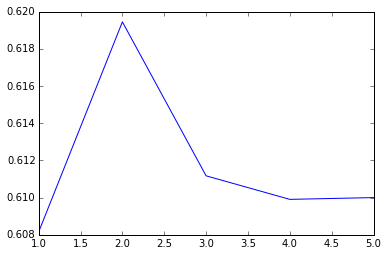

In [258]:
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingClassifier

n = 5
X = range(1,n+1)

sGBT_values = []

for k in X : 
    print k
    sGBT = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=k, random_state=0,loss='deviance')
    cv_auc=cross_validation.cross_val_score(sGBT, treeData, miniLabel, scoring='roc_auc', cv=10)
    
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc/10
    sGBT_values.append(auc)

print sGBT_values

plt.plot(X,sGBT_values)

#### ADA Boost

1
2
3
4
5
6
7
8
9
10
[0.23162429406517909, 0.16414590694142933, 0.14702223461280764, 0.15101248285979069, 0.14582306755782071, 0.14993473374959093, 0.15129994340487857, 0.15836576211962453, 0.1643475585449789, 0.17829038302980113]


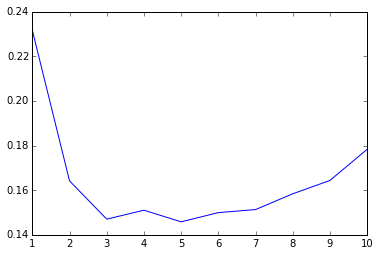

In [259]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_values = []
n = 10
X = range(1,n+1)

for k in X:
    print k
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=k),
                         algorithm="SAMME",
                         n_estimators=100)
    cv_auc=cross_validation.cross_val_score(ada, miniData, miniLabel, scoring='roc_auc', cv=10)
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc / 10
    ada_values.append(auc)

print ada_values
plt.plot(X,ada_values)


In [260]:
#### ADA Boost with selected features

1
2
3
4
5
6
7
8
9
10
[0.60929132256468677, 0.58710239170456069, 0.62021309681637082, 0.61699264502622841, 0.60783701062512585, 0.61019575981741192, 0.60980494277255048, 0.60827599518960118, 0.60962288118331465, 0.60917728270514571]


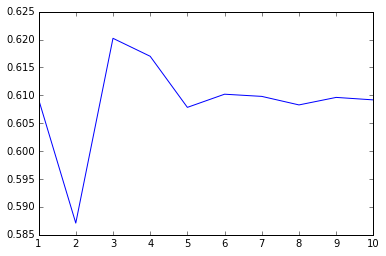

In [261]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

sada_values = []
n = 10
X = range(1,n+1)

for k in X:
    print k
    sada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=k),
                         algorithm="SAMME",
                         n_estimators=100)
    cv_auc=cross_validation.cross_val_score(sada, treeData, miniLabel, scoring='roc_auc', cv=10)
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc / 10
    sada_values.append(auc)

print sada_values
plt.plot(X,sada_values)

#### Random Forest

1
2
3
4
5
6
7
8
9
10
[0.48743467457132256, 0.13893699111354466, 0.096763041233472125, 0.10778663114455056, 0.08898324920801777, 0.089143979590334155, 0.11283644553345273, 0.089454035885520991, 0.088650507363314729, 0.11032191773509314]


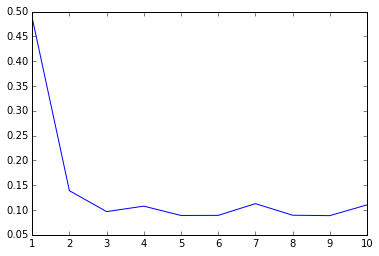

In [263]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

n=10
X=range(1,n+1)

rf_values=[]

for k in X:
    print k
    rf = RandomForestClassifier(n_estimators=100,max_features=20,max_depth=k)
    cv_auc=cross_validation.cross_val_score(rf, miniData, miniLabel, scoring='roc_auc', cv=10)
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc / 10
    rf_values.append(auc)
    
print rf_values
plt.plot(X,rf_values)

#### Random Forest with selected features

1
2
3
4
5
6
7
8
9
10
[0.62199424736337483, 0.62297727290411609, 0.60640694729911959, 0.61341141616033479, 0.61005251232983326, 0.60848797768455087, 0.60861521831290166, 0.61031687847793203, 0.61029749667612099, 0.60847059934845427]


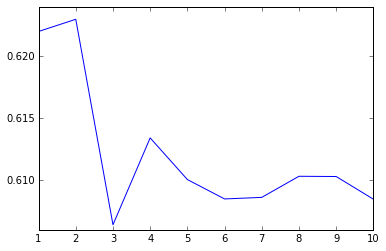

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

n=10
X=range(1,n+1)

srf_values=[]

for k in X:
    print k
    srf = RandomForestClassifier(n_estimators=100,max_features=3,max_depth=k)
    cv_auc=cross_validation.cross_val_score(srf, treeData, miniLabel, scoring='roc_auc', cv=10)
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc / 10
    srf_values.append(auc)
    
print srf_values
plt.plot(X,srf_values)

## V. Adding results

We note that following three measures performed relatively well : 
    - Bagging with n=6 => AUC = 0.736
    - KNN with n=60 => AUC = 0.76
    - Naive Bayes : 0.3 * Continuous + 0.7 * discrete = 0.698

[0.76666622280795882, 0.84498760693837749, 0.85411267596834928, 0.8537330338147916, 0.85047131169276613, 0.84834787623994823, 0.84115383833930824, 0.81852751935752655, 0.81094870047855583, 0.78109578586289918, 0.73195466142698551]


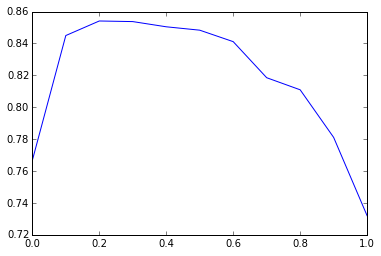

In [322]:
import numpy as np
import sys
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import metrics

knnSample_final = [3,4,10,11,12]

kf = KFold(len(miniData), n_folds=10)
auc=0

weights = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auc_scores = []
for weight in weights:
    for train, test in kf:
        data_train, data_test, labels_train, labels_test = miniData[train], miniData[test], miniLabel[train], miniLabel[test]
    
        #Bagging classifier
        bag_dt=ensemble.BaggingClassifier (
        base_estimator=tree.DecisionTreeClassifier(random_state=0,max_depth=6 ,min_samples_leaf=5), 
        n_estimators=45)
        bag_dt.fit(data_train,labels_train)
        bagProb = bag_dt.predict_proba(data_test)    

        #Parse set for K-nn
        data_train_knn = data_train[:,knnSample_final]
        data_test_knn = data_test[:,knnSample_final]
        labels_train_knn = labels_train
        labels_test_knn = labels_test

        #Form k-nn algorithm
        knnNeigh = KNeighborsClassifier(n_neighbors=60)
        knnNeigh.fit(data_train_knn, labels_train_knn)
        knnProb = knnNeigh.predict_proba(data_test_knn)

        prob = weight * bagProb + (1-weight) * knnProb
        auc += metrics.roc_auc_score(labels_test, prob[:,1])
    auc = auc/10
    auc_scores.append(auc)

print auc_scores
plt.plot(weights, auc_scores)

In [323]:
print max(auc_scores)
print weights[auc_scores.index(max(auc_scores))]

0.854112675968
0.2


#### Hence, we see that max AUC of 0.8541 is acheived when we have 0.2 x bagging classifier + 0.8 x knn